<h1>Task-01</h1>

<h3>Step 1: Install and Import required libraries</h3>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

<h3>Step 2: Load the Dataset</h3>

In [46]:
df = pd.read_csv('Population Dataset/API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN


<h3>Step 3: Data Exploration & Cleaning</h3>

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

<h4>Extract Population of India from the dataset</h4>


In [48]:
india_population = df[df['Country Name'] == 'India'].set_index('Country Name').iloc[:, 4:].T
india_population.columns = ['Total Population']

<h3>Step 3: Visualizing Population Over the Years</h3>

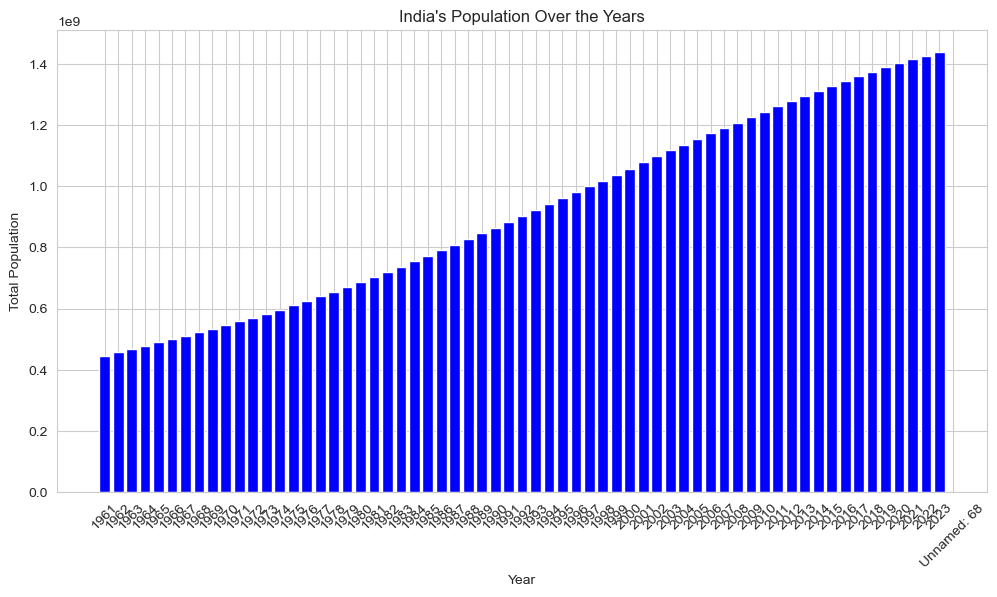

In [49]:
# Plot a histogram to visualize the population distribution over the years
plt.figure(figsize=(12, 6))
plt.bar(india_population.index, india_population['Total Population'], color='blue')
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.title("India's Population Over the Years")
plt.show()


<h3>Step 4: Bar Chart for Population Distribution by Age Groups</h3>

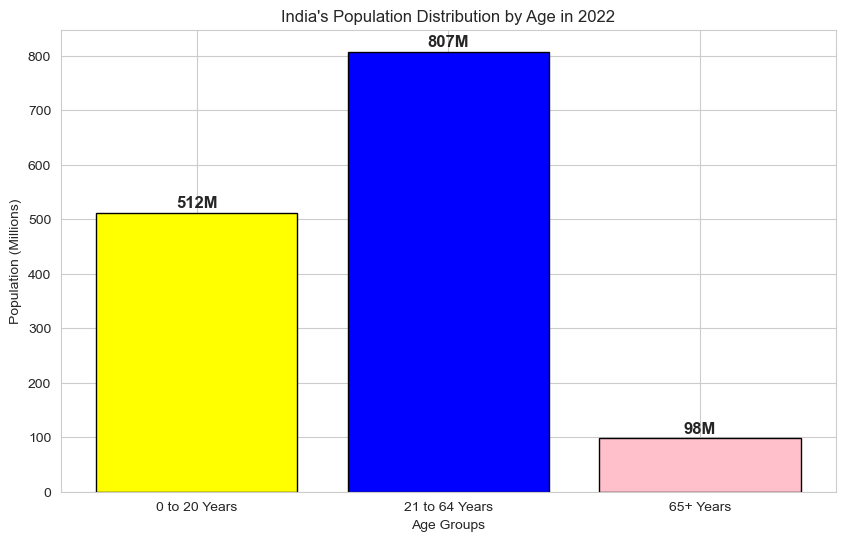

In [50]:
# Define age groups and population distribution
age_groups = ['0 to 20 Years', '21 to 64 Years', '65+ Years']
population = [512, 807, 98]  # In millions

# Define colors for visualization
colors = ['yellow', 'blue', 'pink']

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_groups, population, color=colors, edgecolor='black')

# Add labels and title
plt.xlabel("Age Groups")
plt.ylabel("Population (Millions)")
plt.title("India's Population Distribution by Age in 2022")

# Display values on top of bars
for i, v in enumerate(population):
    plt.text(i, v + 10, f"{v}M", ha='center', fontsize=12, fontweight='bold')

plt.show()


<h3>Step 5: Horizontal Bar Chart (Population by Age & Gender)</h3>

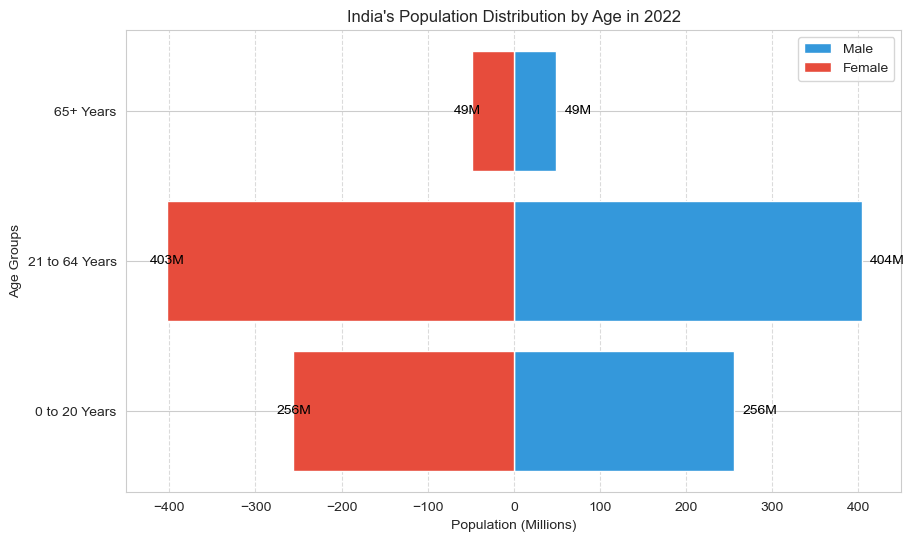

In [51]:
population_male = [256, 404, 49]  
population_female = [256, 403, 49] 

y_pos = np.array([0, 1, 2])  

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(y_pos, population_male, color='#3498db', label='Male')
ax.barh(y_pos, [-p for p in population_female], color='#e74c3c', label='Female')

ax.set_xlabel("Population (Millions)")
ax.set_ylabel("Age Groups")
ax.set_title("India's Population Distribution by Age in 2022")
ax.set_yticks(y_pos)
ax.set_yticklabels(age_groups)
ax.legend()

for i in range(len(population_male)):
    ax.text(population_male[i] + 10, y_pos[i], f"{population_male[i]}M", va='center', fontsize=10, color='black')
    ax.text(-population_female[i] - 20, y_pos[i], f"{population_female[i]}M", va='center', fontsize=10, color='black')

ax.set_xlim(-450, 450)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<h3>Step 6: Pie Chart for Gender Distribution</h3>

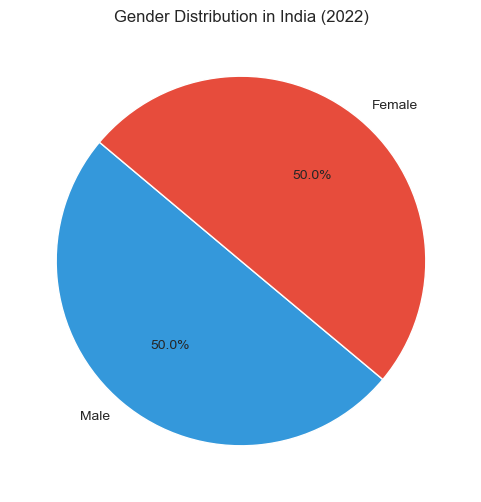

In [52]:
gender_labels = ['Male', 'Female']
gender_population = [sum(population_male), sum(population_female)]
colors = ['#3498db', '#e74c3c']

plt.figure(figsize=(6, 6))
plt.pie(gender_population, labels=gender_labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Gender Distribution in India (2022)")
plt.show()

<h3>Step 7: Area Chart for Population Over Age</h3>

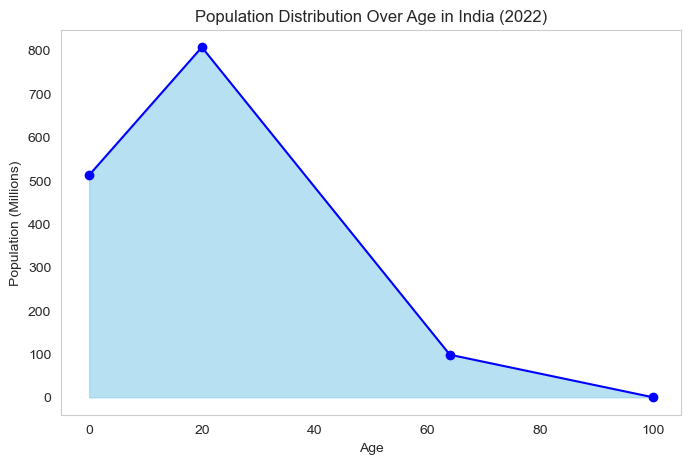

In [53]:
ages = [0, 20, 64, 100]  
populations = [512, 807, 98, 0]  

plt.figure(figsize=(8, 5))
plt.fill_between(ages, populations, color='skyblue', alpha=0.6)
plt.plot(ages, populations, marker='o', color='blue')
plt.xlabel("Age")
plt.ylabel("Population (Millions)")
plt.title("Population Distribution Over Age in India (2022)")
plt.grid()
plt.show()